# Heart Attack Prediction

### Data exploration

In [1]:
# Reading the dataset
import pandas as pd
import numpy as np

In [2]:
heartData = pd.read_csv('/Users/shreya/Desktop/Python Datasets/Regression Datasets/archive/heart.csv', encoding='latin')
print('Shape before deleting duplicate values:', heartData.shape)

Shape before deleting duplicate values: (303, 14)


In [3]:
# Removing duplicate rows if any
heartData=heartData.drop_duplicates()
print('Shape After deleting duplicate values:', heartData.shape)
heartData.head()

Shape After deleting duplicate values: (302, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
heartData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [5]:
# Looking at the statistial distribution of the data
heartData.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='output'>

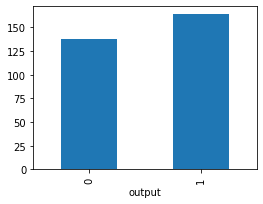

In [7]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=heartData.groupby('output').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [8]:
heartData.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

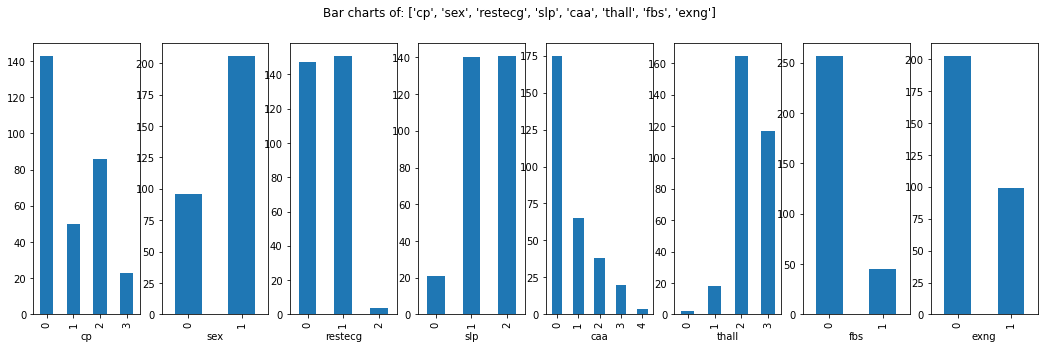

In [44]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=heartData, colsToPlot=['cp', 'sex','restecg','slp','caa','thall','fbs','exng'])

array([[<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'thalachh'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

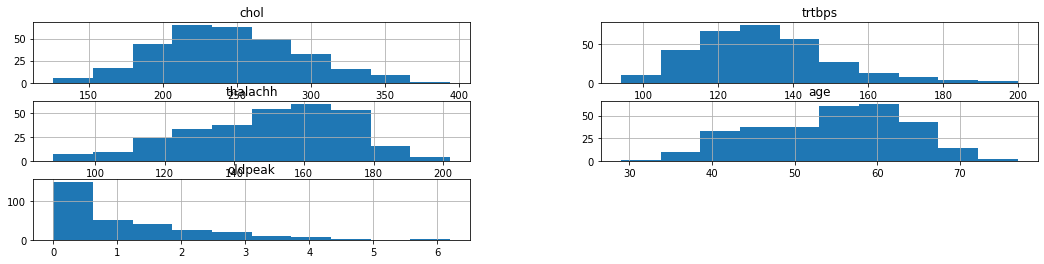

In [29]:
# Plotting histograms of multiple columns together
# Observe that Fare column has outliers
heartData.hist(['chol', 'trtbps','thalachh','age','oldpeak'], figsize=(18,4))

In [11]:
GroupedData=heartData.groupby(['output'])
GroupedData.mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


<AxesSubplot:title={'center':'Average restecg for Each Survival Type'}, xlabel='output'>

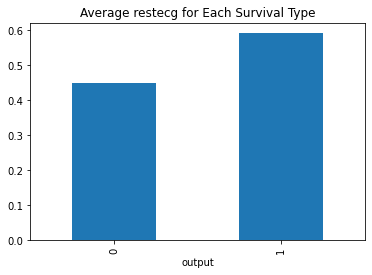

In [14]:
GroupedData.mean()['restecg'].plot(kind='bar', title='Average restecg for Each Survival Type')

<AxesSubplot:title={'center':'chol'}, xlabel='output'>

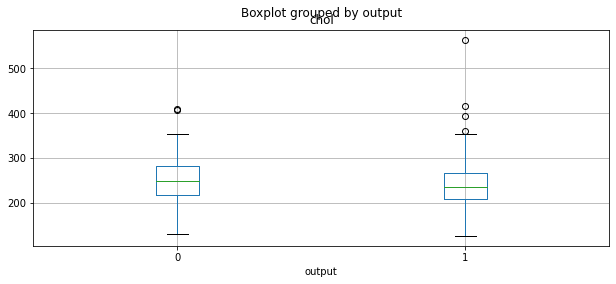

In [15]:
heartData.boxplot(column='chol', by='output', figsize=(10,4), vert=True)

In [21]:
heartData[heartData['chol']>400]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [22]:
heartData['chol'][heartData['chol']>400] = 363

<ipython-input-22-1d8cd18b9ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartData['chol'][heartData['chol']>400] = 363


<AxesSubplot:title={'center':'chol'}, xlabel='output'>

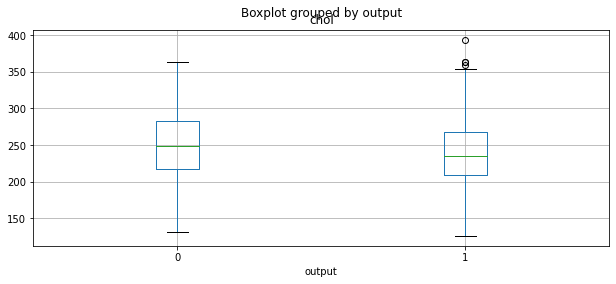

In [23]:
heartData.boxplot(column='chol', by='output', figsize=(10,4), vert=True)

<AxesSubplot:title={'center':'thalachh'}, xlabel='output'>

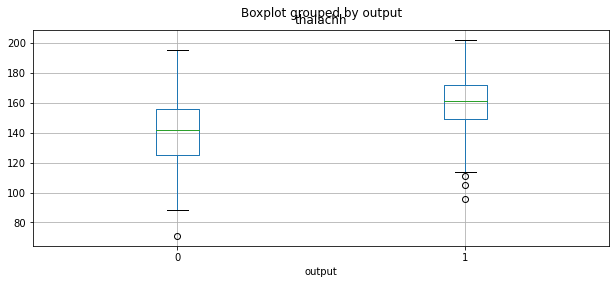

In [25]:
heartData.boxplot(column='thalachh', by='output', figsize=(10,4), vert=True)

In [26]:
heartData[heartData['thalachh']<80]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [27]:
heartData['thalachh'][heartData['thalachh']<80] = 90

<AxesSubplot:title={'center':'thalachh'}, xlabel='output'>

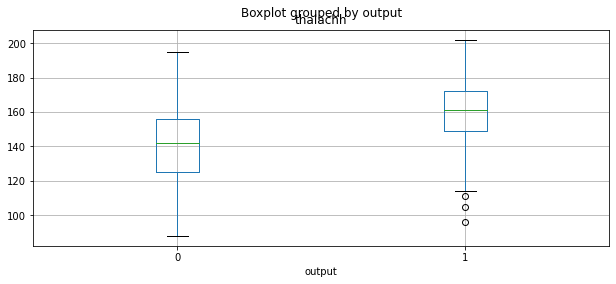

In [28]:
heartData.boxplot(column='thalachh', by='output', figsize=(10,4), vert=True)

<AxesSubplot:title={'center':'age'}, xlabel='output'>

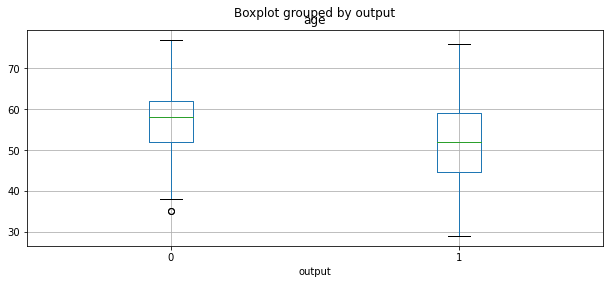

In [30]:
heartData.boxplot(column='age', by='output', figsize=(10,4), vert=True)

<AxesSubplot:title={'center':'oldpeak'}, xlabel='output'>

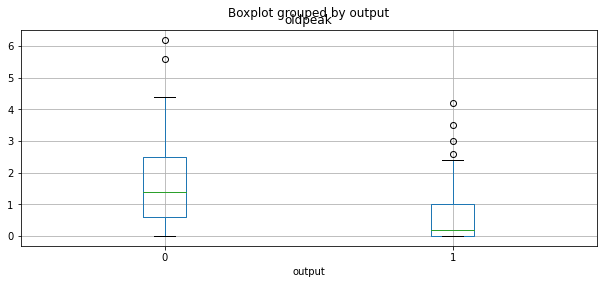

In [31]:
heartData.boxplot(column='oldpeak', by='output', figsize=(10,4), vert=True)

In [33]:
heartData[heartData['age']<36]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0


In [34]:
heartData[heartData['oldpeak']>6]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In [37]:
heartData['oldpeak'][heartData['oldpeak']>5] = 5

<ipython-input-37-de4789c4453f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartData['oldpeak'][heartData['oldpeak']>5] = 5


<AxesSubplot:title={'center':'oldpeak'}, xlabel='output'>

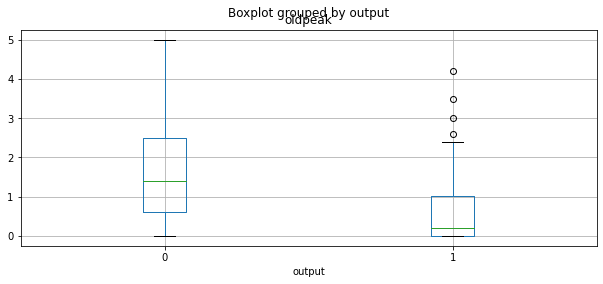

In [38]:
heartData.boxplot(column='oldpeak', by='output', figsize=(10,4), vert=True)

In [39]:
from scipy.stats import f_oneway
Survived_0=heartData['chol'][heartData['output']==0]
Survived_1=heartData['chol'][heartData['output']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0881672722348488


In [40]:
Survived_0=heartData['trtbps'][heartData['output']==0]
Survived_1=heartData['trtbps'][heartData['output']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.010926538861949038


In [41]:
Survived_0=heartData['thalachh'][heartData['output']==0]
Survived_1=heartData['thalachh'][heartData['output']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.2869922598529525e-14


In [42]:
Survived_0=heartData['age'][heartData['output']==0]
Survived_1=heartData['age'][heartData['output']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.00010394837285417


In [43]:
Survived_0=heartData['oldpeak'][heartData['output']==0]
Survived_1=heartData['oldpeak'][heartData['output']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  3.573044605706648e-15


### for continous data trtbps, thalachh, age, oldpeak are significant

In [45]:
CrossTabResult=pd.crosstab(index=heartData['cp'], columns=heartData['output'])
CrossTabResult

output,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


<AxesSubplot:xlabel='cp'>

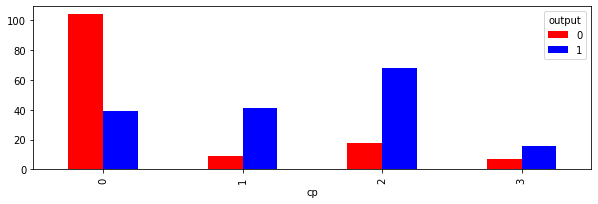

In [46]:
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [47]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.8926838351935918e-17


In [48]:
CrossTabResult=pd.crosstab(index=heartData['sex'], columns=heartData['output'])
CrossTabResult

output,0,1
sex,,
0,24,72
1,114,92


In [49]:

ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.5508552054949547e-06


In [50]:
CrossTabResult=pd.crosstab(index=heartData['restecg'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.007713053269318974


In [51]:
CrossTabResult=pd.crosstab(index=heartData['slp'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 6.577782760917924e-11


In [52]:
CrossTabResult=pd.crosstab(index=heartData['caa'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.771038067427657e-15


In [53]:
CrossTabResult=pd.crosstab(index=heartData['thall'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.146295138318122e-18


In [54]:
CrossTabResult=pd.crosstab(index=heartData['fbs'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.7611374700928197


In [ ]:
['cp', 'sex','restecg','slp','caa','thall','fbs','exng'])

In [55]:
CrossTabResult=pd.crosstab(index=heartData['exng'], columns=heartData['output'])
ChiSqResult = chi2_contingency(CrossTabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 9.556466486179178e-14


### catogorical significant value are 'cp', 'sex','restecg','slp','caa','thall','exng'

In [56]:
# Finding out how many missing values are present in each column
heartData.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [58]:
heartDataNumeric=heartData

In [59]:
heartDataNumeric.to_pickle('/Users/shreya/Desktop/Python Datasets/Regression Datasets/archive/heartDataNumeric.pkl')

In [61]:
heartDataNumeric.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Machine learning for Classification

In [64]:
TargetVariable='output'
Predictors=['age', 'sex', 'cp', 'trtbps','restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X=heartDataNumeric[Predictors].values
y=heartDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(226, 11)
(226,)
(76, 11)
(76,)


## Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

[[29  6]
 [ 5 36]]
Accuracy of the model: 0.86


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


## Decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

[[29  6]
 [ 8 33]]
Accuracy of the model: 0.82


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,1
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


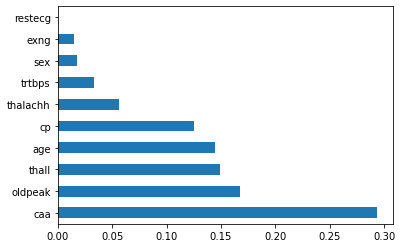

In [82]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [84]:
!pip install dtreeplt

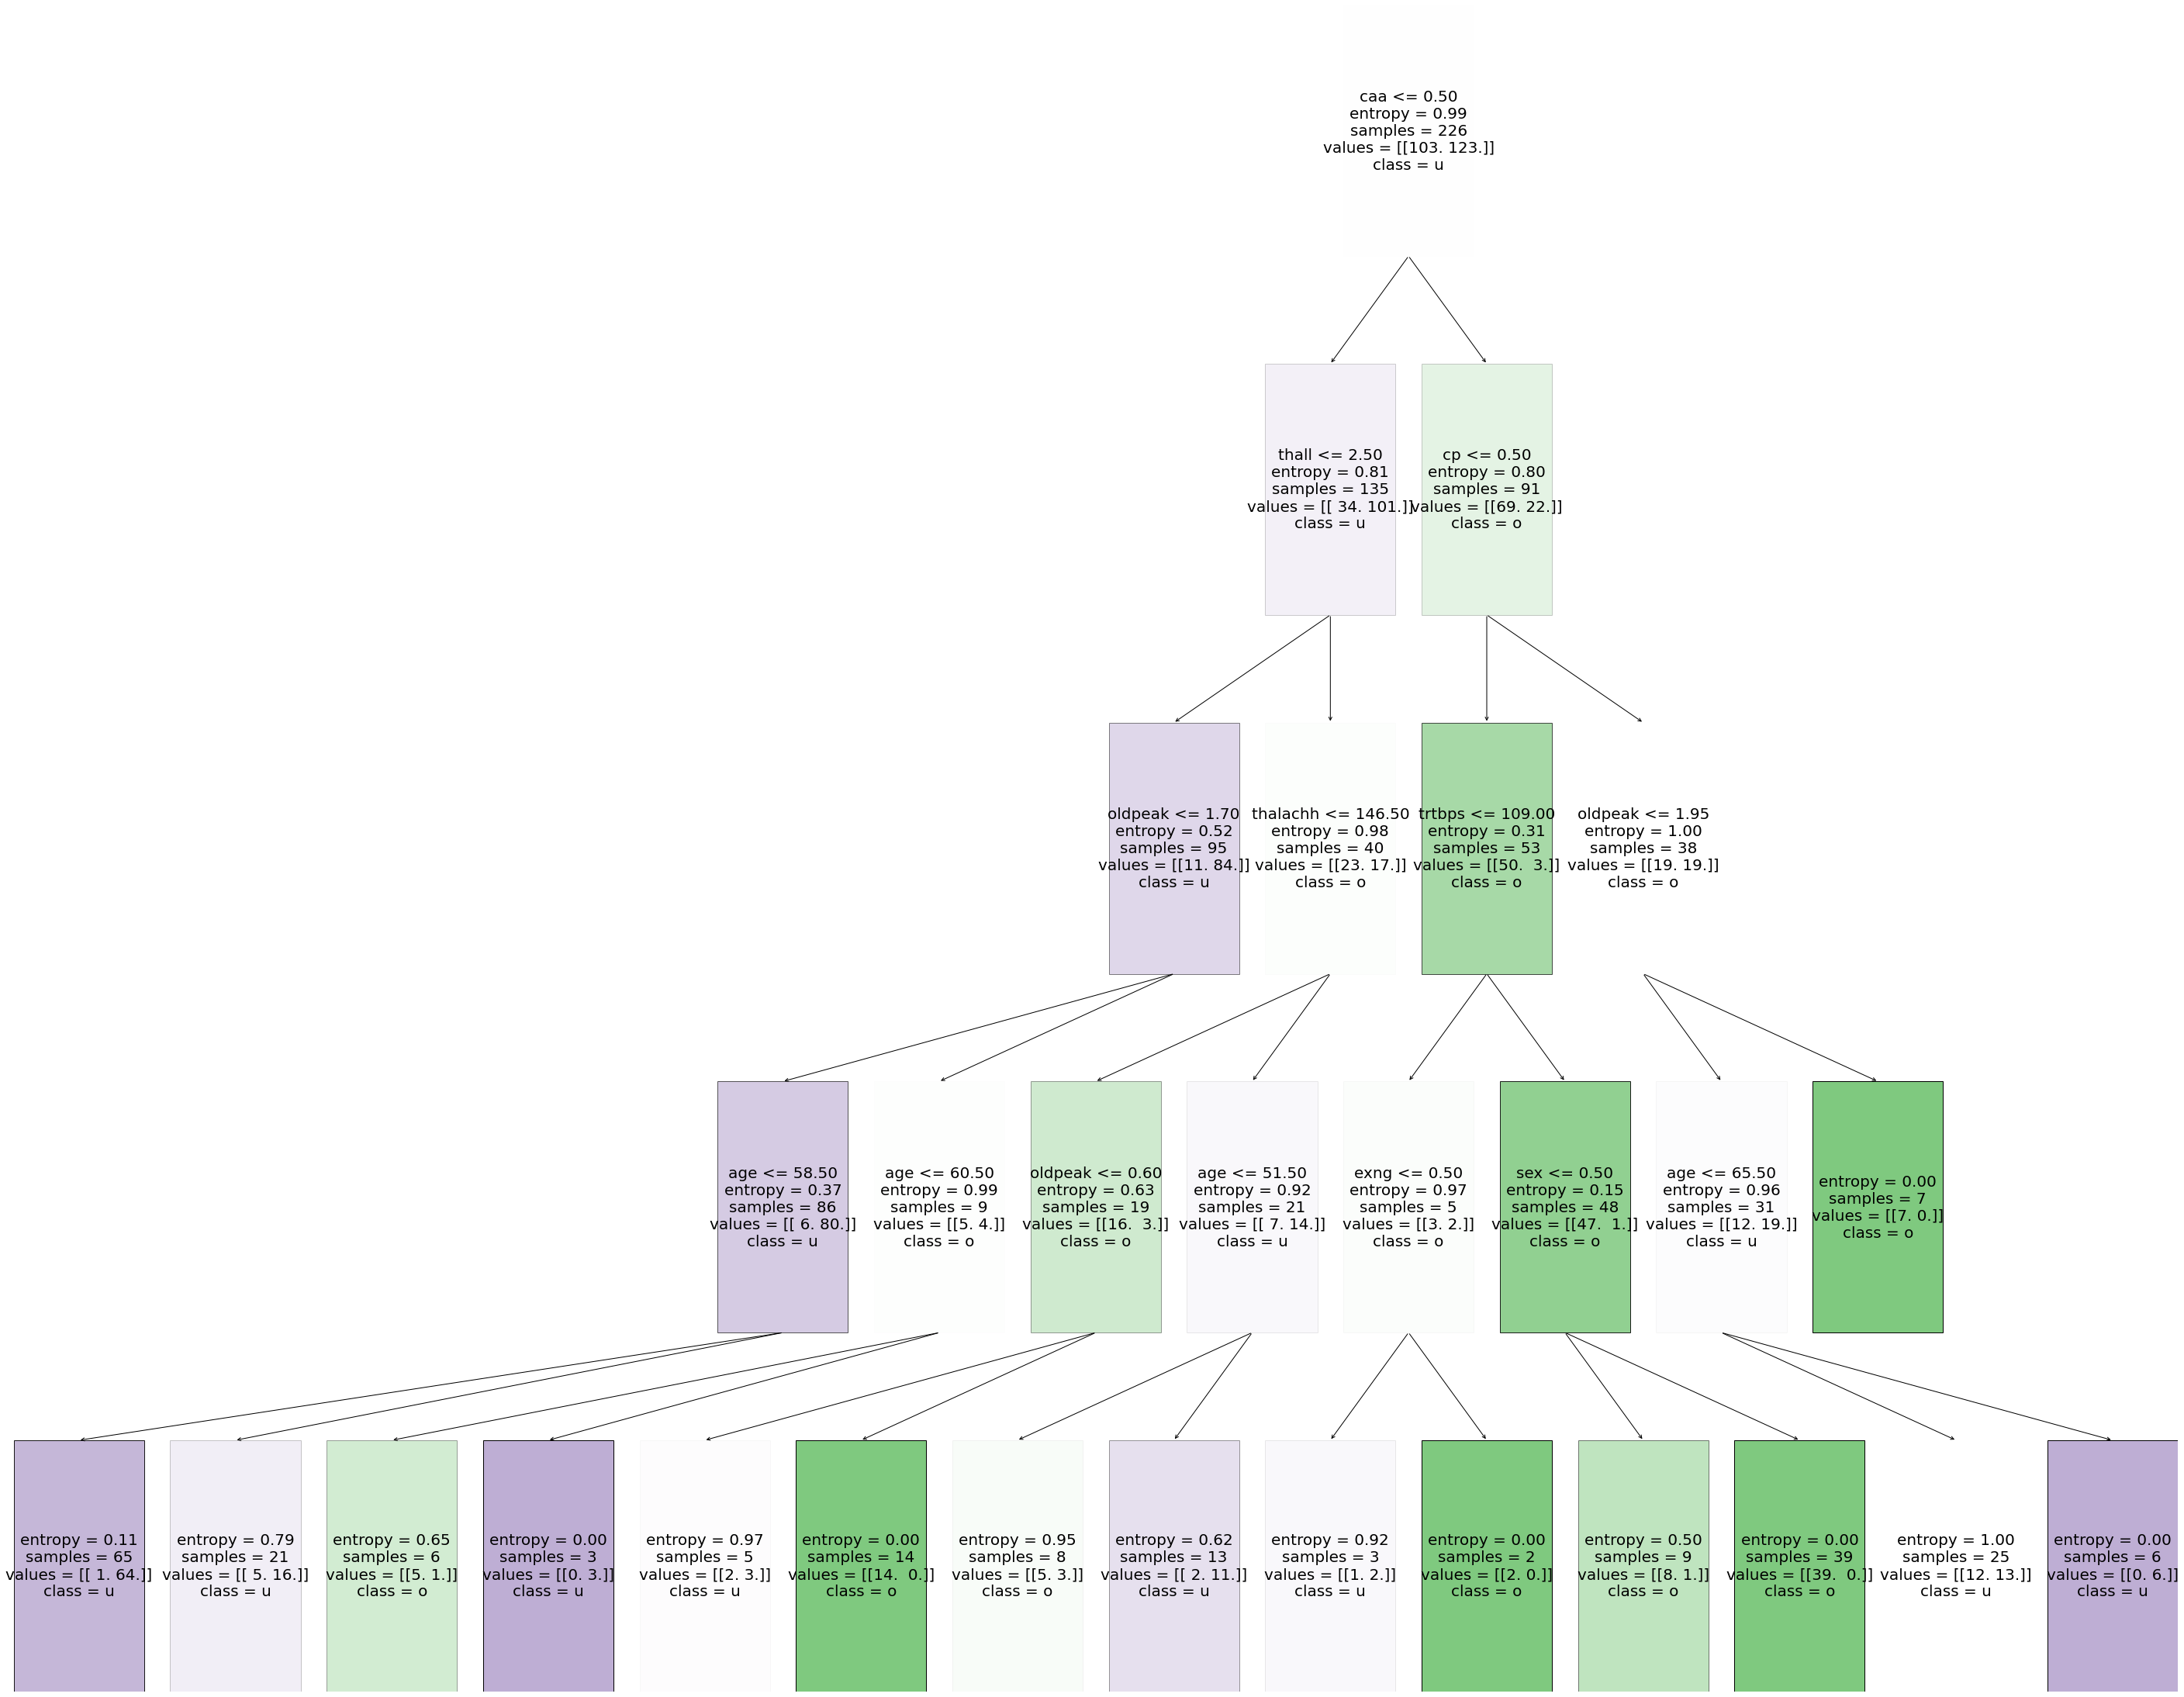

In [88]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Get current figure and change its size
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,40)

## Random Forest

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

[[30  5]
 [ 4 37]]
Accuracy of the model: 0.88


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


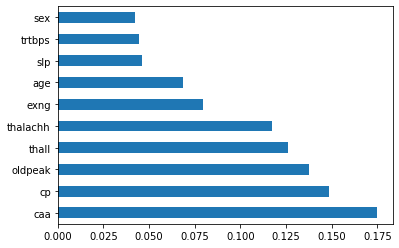

In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/dtreeplt/dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


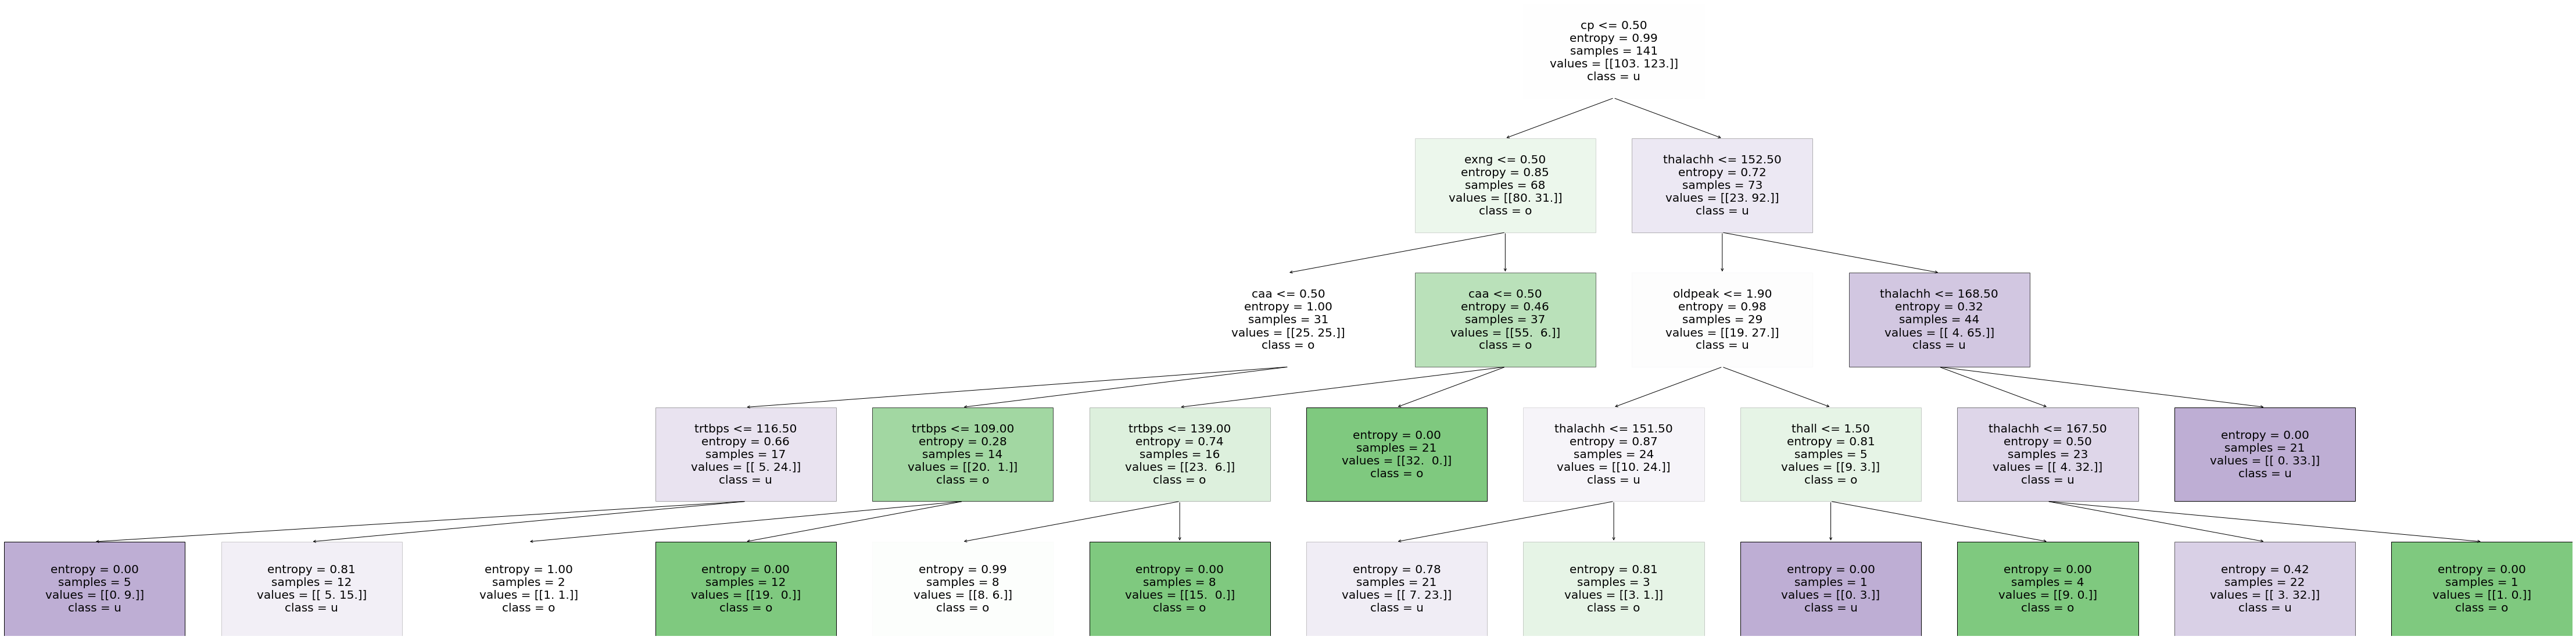

In [98]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.06, n_estimators=100)
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

[[30  5]
 [ 5 36]]
Accuracy of the model: 0.87


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,1
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,0
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


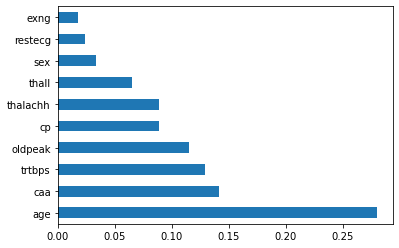

In [107]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.06)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/dtreeplt/dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


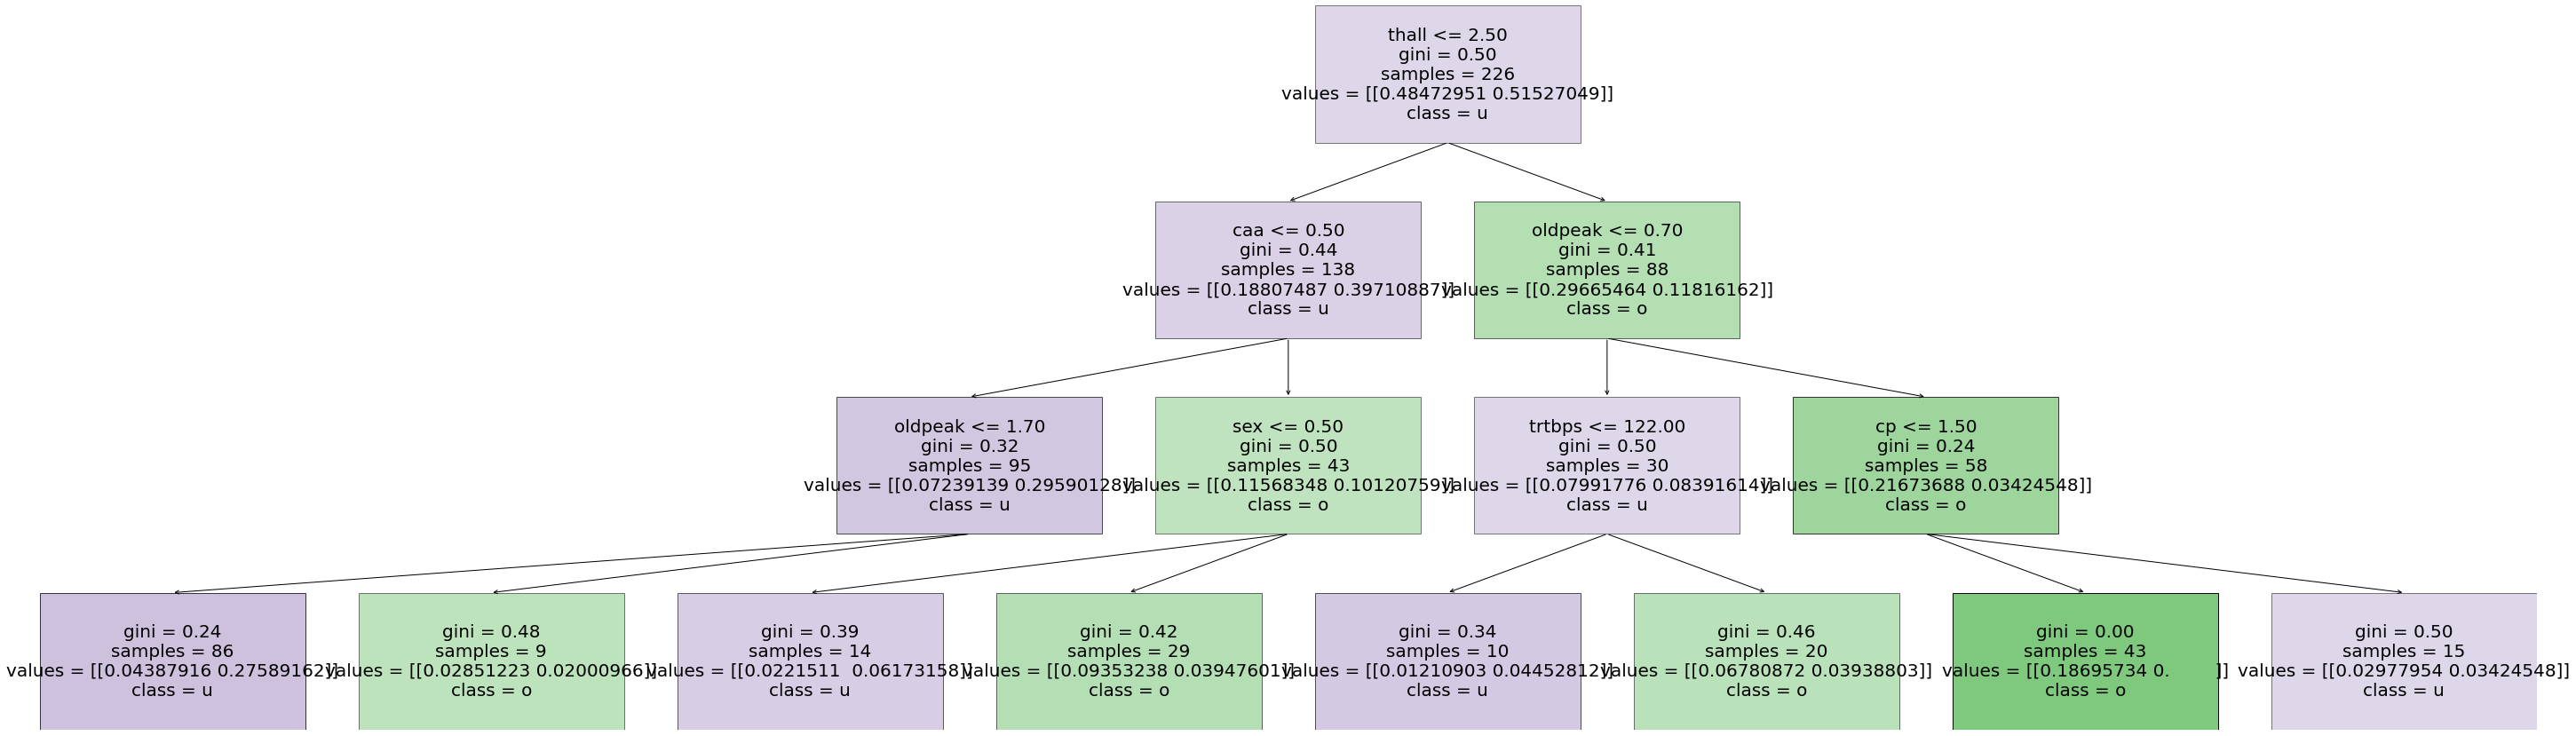

In [108]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

In [110]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 882 kB/s eta 0:00:01


In [113]:
!brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
aerc                       iconsur                    php@7.4
aida-header                imath                      phpbrew
aliddns                    indicators                 pkger
ansible@2.9                influxdb@1                 proj@7
archey4                    inframap                   projectm
as-tree                    ipinfo-cli                 ptpython
atkmm@2.28                 isl@0.18                   pure
attr                       jpeg-xl                    pyqt-3d
atuin                      jql                        pyqt-builder
autoconf@2.69              json5                      pyqt-networkauth
autorestic                 julia                      pyside@2
aws-console                kcgi                       python-tabulate
aws-rotate-key             keptn                      python-tk@3.9
bandit                     kertish-dfs                qodem
bas55        

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[02:18:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

[[29  6]
 [ 5 36]]
Accuracy of the model: 0.86


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,1
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


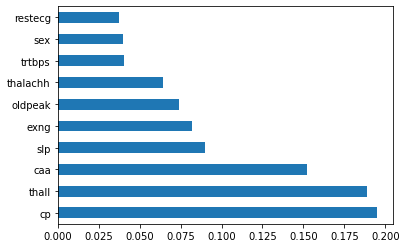

In [122]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [125]:
!pip install Graphviz

In [127]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 8.1 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=4eaea1ed4659f6a2164bd656baee74432ff7d6d6f65f20f836f4f17a16f21cc0
  Stored in directory: /Users/shreya/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


## KNN

In [137]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.79      0.66      0.72        41

    accuracy                           0.72        76
   macro avg       0.73      0.73      0.72        76
weighted avg       0.74      0.72      0.72        76

[[28  7]
 [14 27]]
Accuracy of the model: 0.72


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,0


## SVM

In [154]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=40, kernel='rbf', gamma=0.005)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=40, gamma=0.005)
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.76      0.78      0.77        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

[[25 10]
 [ 9 32]]
Accuracy of the model: 0.75


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


## Naive Bayes

In [155]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB()
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.92      0.88      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.89        76

[[32  3]
 [ 5 36]]
Accuracy of the model: 0.89


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,TargetColumn,Predictedoutput
0,55.0,1.0,0.0,132.0,1.0,132.0,1.0,1.2,1.0,1.0,3.0,0,0
1,64.0,1.0,2.0,125.0,1.0,131.0,1.0,1.8,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,66.0,1.0,1.0,160.0,1.0,120.0,1.0,0.0,1.0,3.0,1.0,0,0
4,71.0,0.0,2.0,110.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1


## Thank you